In [3]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = pd.read_csv(r"D:\NATPAC\Datasets\combined.csv")
df.drop(df.columns[0], axis=1, inplace=True)

X = df.drop(columns=['2022'])
y = df['2022']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model_cat = CatBoostRegressor(n_estimators=30000)
model_cat.fit(X_train, y_train)

predictions_cat = model_cat.predict(X_test)

mae_cat = mean_absolute_error(y_test, predictions_cat)
print("Mean Absolute Error for catoost model:", mae_cat)

features_2022 = df[df.columns.difference(['2022'])].tail(366)
forecast_2022_cat = model_cat.predict(features_2022)
print(forecast_2022_cat)

Learning rate set to 0.002163
0:	learn: 759362.8568738	total: 2.85ms	remaining: 1m 25s
1:	learn: 759223.2816303	total: 5.55ms	remaining: 1m 23s
2:	learn: 759127.2697126	total: 7.85ms	remaining: 1m 18s
3:	learn: 759034.4271319	total: 10ms	remaining: 1m 15s
4:	learn: 758936.0263990	total: 11.6ms	remaining: 1m 9s
5:	learn: 758869.9160604	total: 13.4ms	remaining: 1m 7s
6:	learn: 758738.7002059	total: 15ms	remaining: 1m 4s
7:	learn: 758628.4270926	total: 17.4ms	remaining: 1m 5s
8:	learn: 758566.7739051	total: 19.9ms	remaining: 1m 6s
9:	learn: 758488.3399095	total: 21.6ms	remaining: 1m 4s
10:	learn: 758388.5316073	total: 23.4ms	remaining: 1m 3s
11:	learn: 758272.2840740	total: 25.2ms	remaining: 1m 3s
12:	learn: 758151.8903522	total: 27.1ms	remaining: 1m 2s
13:	learn: 758071.5366089	total: 29.1ms	remaining: 1m 2s
14:	learn: 757965.2375740	total: 30.9ms	remaining: 1m 1s
15:	learn: 757838.6098494	total: 33.2ms	remaining: 1m 2s
16:	learn: 757776.2890022	total: 35.1ms	remaining: 1m 1s
17:	learn: 

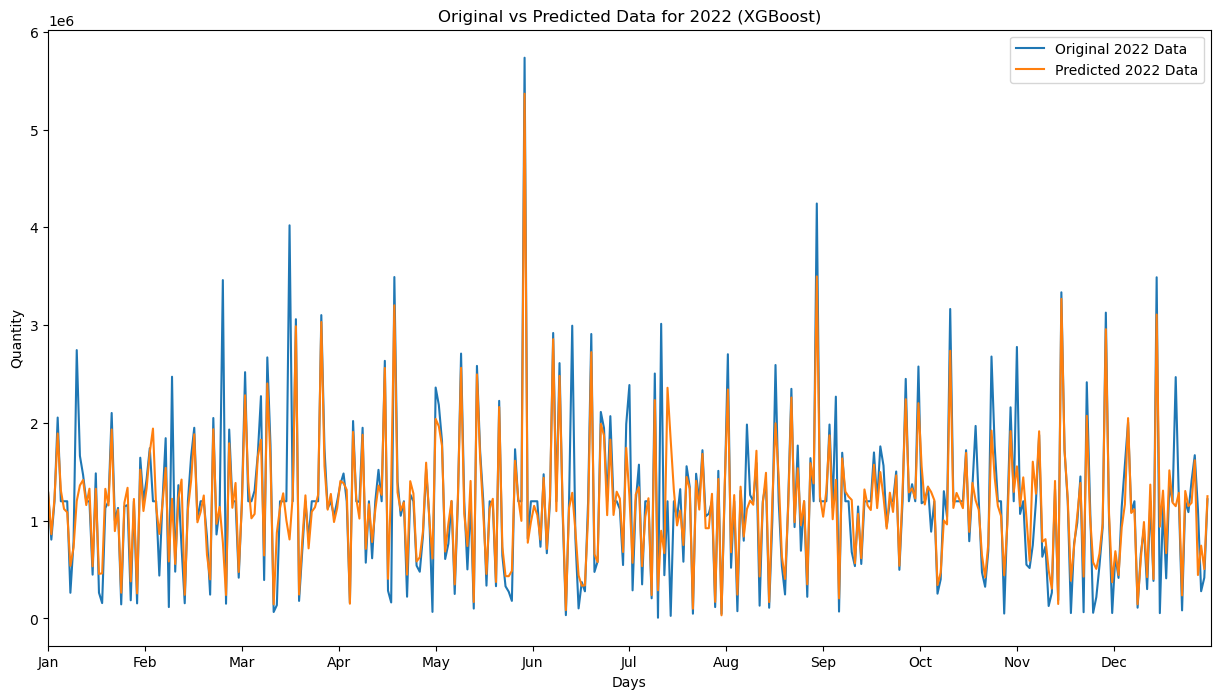

In [5]:
import matplotlib.pyplot as plt
original_data_2022 = df['2022'].tail(366).values
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ticks = np.arange(0, 366, 30.5)
days = range(366)
plt.figure(figsize=(15, 8))
plt.plot(original_data_2022, label='Original 2022 Data')
plt.plot(forecast_2022_cat, label='Predicted 2022 Data')
plt.xlabel('Days')
plt.ylabel('Quantity')
plt.title('Original vs Predicted Data for 2022 (XGBoost)')
plt.xticks(month_ticks, months)
plt.xlim(0, 366)
plt.legend()
plt.show()